<a href="https://colab.research.google.com/github/dgx781/Deep-learning/blob/DataScience-Ocean/CNN_with_CIFAR10_DATASET_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [73]:
import tensorflow as tf
from tensorflow import keras

In [74]:
(x_train, y_train), (x_test, y_test)= keras.datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [75]:
x_test.shape

(10000, 32, 32, 3)

In [76]:
y_train.shape

(50000, 1)

In [77]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [78]:
y_train= y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [79]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [80]:
x_train[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

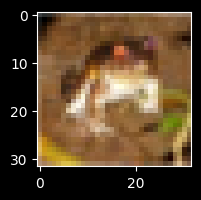

In [81]:
plt.style.use('dark_background')
plt.figure(figsize=(15,2))
plt.imshow(x_train[0])

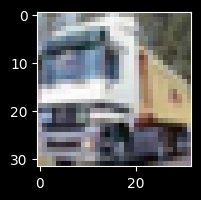

In [82]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[1])

In [83]:
classes= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horses', 'ship', 'truck']

In [84]:
classes[9]

'truck'

In [85]:
def plot_sample(x, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

In [86]:
classes[y_train[6]]

'bird'

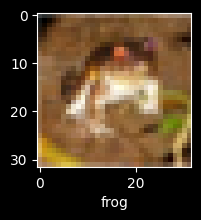

In [87]:
plot_sample(x_train, y_train, 0)

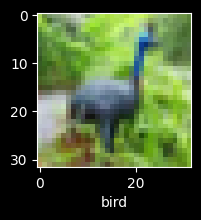

In [88]:
plot_sample(x_train, y_train, 6)

In [89]:
x_train= x_train/255
x_test= x_test/255

## **`Creating Artificial Neural Network for testing the accuracy`**

In [90]:
ann= keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [ ]:
ann.compile(optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
ann.fit(x_train, y_train, epochs=5)

In [ ]:
ann.evaluate(x_test, y_test)

In [ ]:
from sklearn.metrics import classification_report
y_pred= ann.predict(x_test)
Y_pred_classes= [np.argmax(element) for element in y_pred]

In [ ]:
print('classification_report:\n', classification_report(y_test, Y_pred_classes))

#Creating Convolutional Neural Network

```
# This is formatted as code
```



##Using Optimizer SGD

In [ ]:
cnn= keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [96]:
cnn.compile(optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [97]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 72s 45ms/step - loss: 1.9997 - accuracy: 0.2765
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.6416 - accuracy: 0.4140
Epoch 3/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.4640 - accuracy: 0.4762
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.3676 - accuracy: 0.5112
Epoch 5/10
1563/1563 [==============================] - 60s 39ms/step - loss: 1.2942 - accuracy: 0.5407
Epoch 6/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.2284 - accuracy: 0.5666
Epoch 7/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.1745 - accuracy: 0.5849
Epoch 8/10
1563/1563 [==============================] - 60s 39ms/step - loss: 1.1260 - accuracy: 0.6043
Epoch 9/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.0848 - accuracy: 0.6209
Epoch 10/10
1563/1563 [==============================] - 59s 38m

In [98]:
y_pred= cnn.predict(x_test)
y_pred

313/313 [==============================] - 5s 17ms/step


array([[1.55807668e-02, 7.86850927e-04, 9.04467106e-02, ...,
        2.07930012e-03, 1.33120995e-02, 8.53898295e-04],
       [2.27219090e-01, 5.51051915e-01, 1.06012844e-03, ...,
        4.20632241e-05, 1.97275385e-01, 2.27261130e-02],
       [2.98489392e-01, 3.19019973e-01, 7.00252736e-03, ...,
        1.70458481e-03, 2.52591014e-01, 1.13481171e-01],
       ...,
       [9.44524654e-05, 3.46930137e-05, 2.34724328e-01, ...,
        9.57287569e-03, 2.50354438e-04, 4.44234058e-04],
       [1.56177860e-02, 3.14613700e-01, 6.67515351e-03, ...,
        3.53905978e-03, 9.87772015e-04, 6.40896894e-03],
       [3.76300246e-04, 1.26992143e-03, 3.52877914e-03, ...,
        8.54559362e-01, 2.01363018e-05, 8.31248180e-04]], dtype=float32)

In [99]:
y_classes= [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 1, 0, 4]

In [104]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [105]:
classes[y_classes[3]]

'airplane'

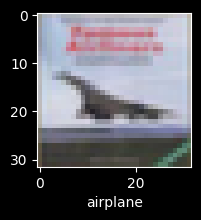

In [106]:
y_test= y_test.reshape(-1,)
plot_sample(x_test, y_test, 3)

In [107]:
print('classification_report:\n', classification_report(y_test, y_classes))

classification_report:
               precision    recall  f1-score   support

           0       0.68      0.70      0.69      1000
           1       0.71      0.74      0.73      1000
           2       0.48      0.55      0.52      1000
           3       0.46      0.43      0.44      1000
           4       0.58      0.51      0.54      1000
           5       0.54      0.51      0.53      1000
           6       0.69      0.72      0.70      1000
           7       0.67      0.70      0.69      1000
           8       0.82      0.63      0.72      1000
           9       0.62      0.73      0.67      1000

    accuracy                           0.62     10000
   macro avg       0.63      0.62      0.62     10000
weighted avg       0.63      0.62      0.62     10000



##Using Optimizer Adam

In [108]:
cnn.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [109]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 62s 38ms/step - loss: 1.0819 - accuracy: 0.6202
Epoch 2/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9624 - accuracy: 0.6642
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8724 - accuracy: 0.6947
Epoch 4/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.8004 - accuracy: 0.7188
Epoch 5/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7409 - accuracy: 0.7409
Epoch 6/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.6841 - accuracy: 0.7587
Epoch 7/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.6357 - accuracy: 0.7767
Epoch 8/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.5923 - accuracy: 0.7908
Epoch 9/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.5511 - accuracy: 0.8060
Epoch 10/10
1563/1563 [==============================] - 57s 37m

In [111]:
y_cnn_pred= cnn.predict(x_test)
y_cnn_pred

313/313 [==============================] - 5s 17ms/step


array([[3.19733797e-03, 4.28558587e-06, 1.28171421e-04, ...,
        3.72318791e-05, 3.44311033e-04, 1.90436222e-05],
       [3.15473095e-04, 2.20117698e-04, 5.48444490e-08, ...,
        3.29651056e-10, 9.99403596e-01, 6.05230780e-05],
       [3.49291921e-01, 1.05102286e-01, 1.00413673e-02, ...,
        8.70678108e-04, 5.24790764e-01, 7.79314991e-03],
       ...,
       [1.33366957e-05, 4.28131329e-07, 2.86201954e-01, ...,
        1.35720354e-02, 3.52229176e-06, 2.23248826e-05],
       [2.31659472e-01, 4.30835009e-01, 2.72317757e-05, ...,
        3.05801426e-04, 1.58396506e-05, 8.10120837e-05],
       [2.90532142e-07, 2.71789977e-05, 4.86281442e-06, ...,
        9.73260760e-01, 1.84553556e-07, 6.27238876e-07]], dtype=float32)

In [112]:
y_cnn_classes= [np.argmax(element) for element in y_cnn_pred]
y_cnn_classes[:5]

[3, 8, 8, 0, 4]

In [113]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [114]:
classes[y_cnn_classes[4]]

'deer'

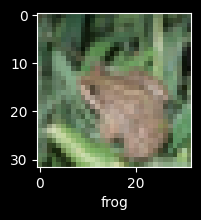

In [115]:
plot_sample(x_test, y_test, 4)

In [117]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 7s 22ms/step - loss: 1.0298 - accuracy: 0.6865


[1.0298023223876953, 0.6865000128746033]

In [116]:
print('classification_report:\n', classification_report(y_test, y_cnn_classes))

classification_report:
               precision    recall  f1-score   support

           0       0.69      0.77      0.73      1000
           1       0.79      0.81      0.80      1000
           2       0.62      0.52      0.56      1000
           3       0.47      0.54      0.50      1000
           4       0.65      0.61      0.63      1000
           5       0.60      0.57      0.58      1000
           6       0.73      0.77      0.75      1000
           7       0.77      0.71      0.74      1000
           8       0.78      0.82      0.80      1000
           9       0.78      0.74      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

